## Insurance Claims- Fraud Detection
##### Problem Statement:
#### Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")
sns.set_style('whitegrid')
from matplotlib.cm import rainbow
from sklearn.preprocessing import LabelEncoder,PowerTransformer,StandardScaler
from scipy.stats import zscore
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix, classification_report,precision_score , accuracy_score , recall_score,precision_recall_curve

import warnings 
warnings.filterwarnings('ignore')


In [2]:
Idf = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
Idf

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## EDA

In [3]:
Idf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Features with int datatype



In [7]:
int_type = [feature for feature in Idf.columns if Idf[feature].dtypes !='O']
print(int_type)
print("Number of columns with integer data type in a df is :" , len(int_type))

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', '_c39']
Number of columns with integer data type in a df is : 19


Features with object datatype



In [8]:
object_type = [feature for feature in Idf.columns if Idf[feature].dtypes =='O']
print(object_type)
print("Number of columns with object data type in a df is :" , len(object_type))

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
Number of columns with object data type in a df is : 21


months_as_customer


<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

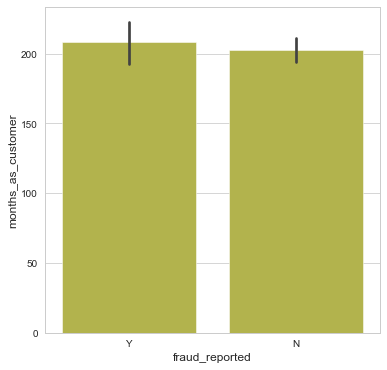

In [13]:
plt.figure(figsize = (6,6))
sns.barplot( x = 'fraud_reported' , y ='months_as_customer', data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

In [14]:
Idf['months_as_customer'].value_counts()


194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

In here we are not able to find much relation in between this feature and our target variable .



## Age


In [15]:
Idf['age'].value_counts()


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

In [16]:
print(Idf['age'].min())
print(Idf['age'].max())

19
64


In [17]:
Idf['age'] = pd.cut(Idf.age, bins = [10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, 
                          labels = ['11-20','21-30','31-40', '41-50', '51-60', '61-70'])

<AxesSubplot:xlabel='age', ylabel='count'>

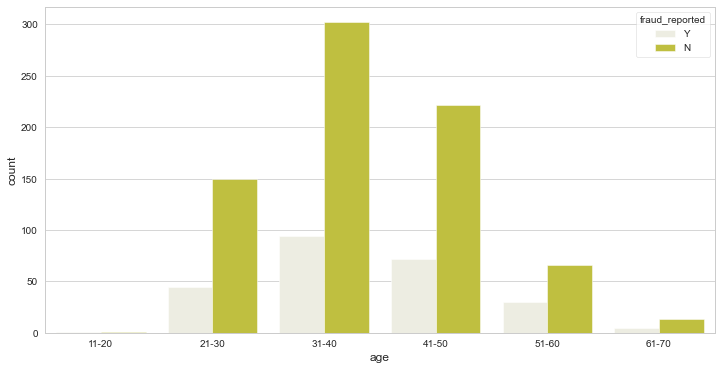

In [21]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'age' , hue = 'fraud_reported' , data = Idf , dodge = True , color = 'yellow' , saturation = 0.5)

## policy_number


In [22]:
Idf['policy_number'].value_counts()


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

<AxesSubplot:xlabel='policy_number', ylabel='count'>

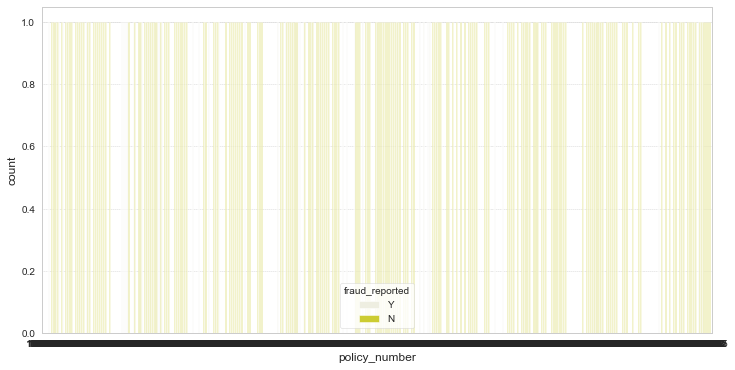

In [26]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_number' , hue = 'fraud_reported' , data = Idf , dodge = True , color = 'yellow' , saturation = 0.6)

From above we can observe that there is no such relation between predictor policy_number and our target variable , its just a number so we'll drop this in our Feature Selection.

## policy_deductable

In [27]:
Idf['policy_deductable'].nunique()


3

In [28]:
Idf['policy_deductable'].value_counts()


1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

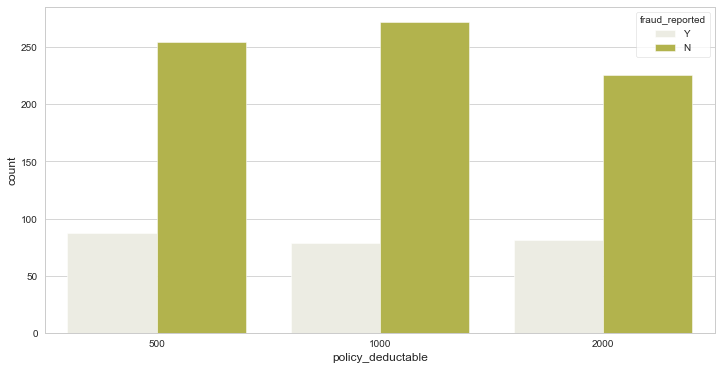

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x ='policy_deductable',hue ='fraud_reported' , data = Idf , dodge = True , color = 'yellow' , saturation = 0.4)

From above we can observe that policy_deductable with 1000 has the highest fraud reports.

## policy_annual_premium


In [30]:
Idf['policy_annual_premium'].nunique()

991

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

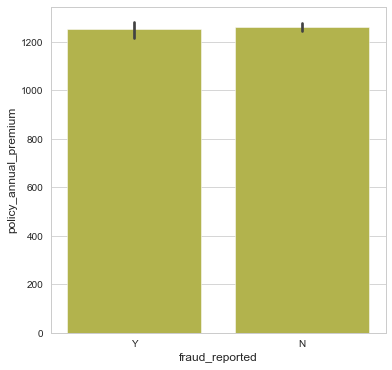

In [31]:
plt.figure(figsize = (6,6))
sns.barplot(x ='fraud_reported' , y ='policy_annual_premium',data = Idf,dodge = True,color = 'yellow',saturation = 0.4)

From above we can observe that there is not much variations in this dataset , further we'll drop this feature.

## umbrella_limit

In [32]:
Idf['umbrella_limit'].value_counts()


 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In here we can observe that lots of values are 0 , so we'll group all the other as 1.
So here umbrella_limit will be either 0 or 1 means some other value that is not 0.

In [33]:
Idf['umbrella_limit'].replace([6000000 ,  5000000 , 4000000 ,  7000000 , 
                              3000000 , 8000000 ,9000000 , 2000000 , 10000000 ,-1000000] , 1 , inplace = True )

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

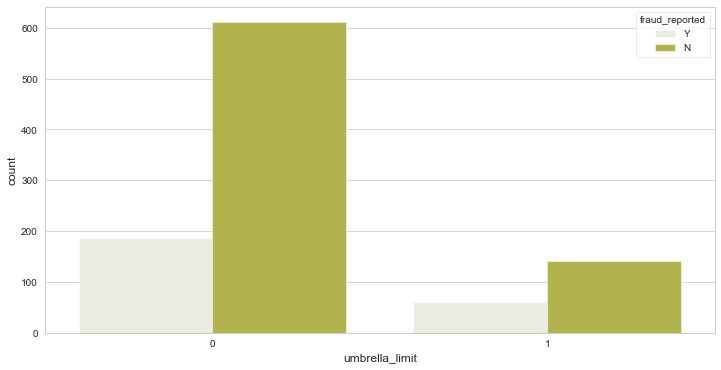

In [35]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'umbrella_limit' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)


## insured_zip


In [36]:
Idf['insured_zip'].value_counts()


477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

In [37]:
Idf['insured_zip'].nunique()


995

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

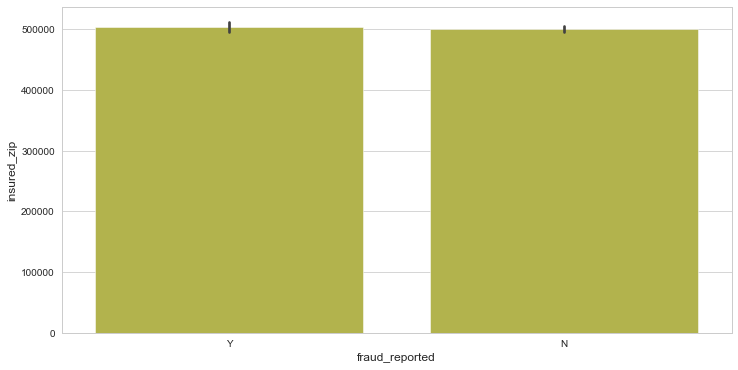

In [39]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'fraud_reported' , y ='insured_zip' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)


From above we can observe that there is not much variations in this feature , hence later on we'll drop this feautre in Feature Selection.

## Capital gain & Loss

In [40]:
Idf['capital-gains'].value_counts()


0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

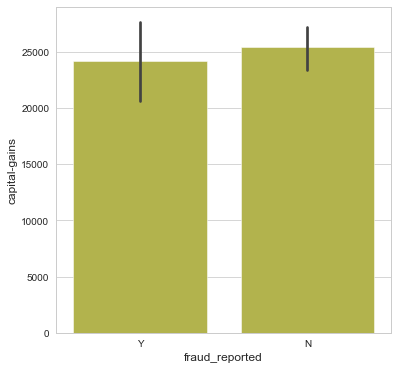

In [42]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'fraud_reported',y = 'capital-gains',data = Idf , dodge = True , color = 'yellow' , saturation = 0.4)

## capital-loss


In [43]:
Idf['capital-loss'].value_counts()


 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

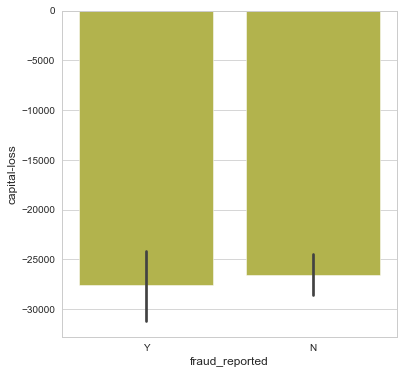

In [44]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'fraud_reported', y = 'capital-loss',data = Idf , dodge = True , color = 'yellow' , saturation = 0.4)

Here simply we can create a single column as Capital difference only , but in both of them most of the values are 0 , so we can drop these features in our feature selection procedure.

### incident_hour_of_the_day


In [45]:
Idf['incident_hour_of_the_day'].value_counts()


17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

In here we'll create different bins for different hours in this.



In [46]:
Idf['incident_hour_of_the_day'] = pd.cut(Idf.incident_hour_of_the_day, bins = [6 , 12 , 18 , 24 , 32], 
                                        include_lowest = False , 
                                        labels = ['0-6' , '6-12' , '12-18' , '18-24' ])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

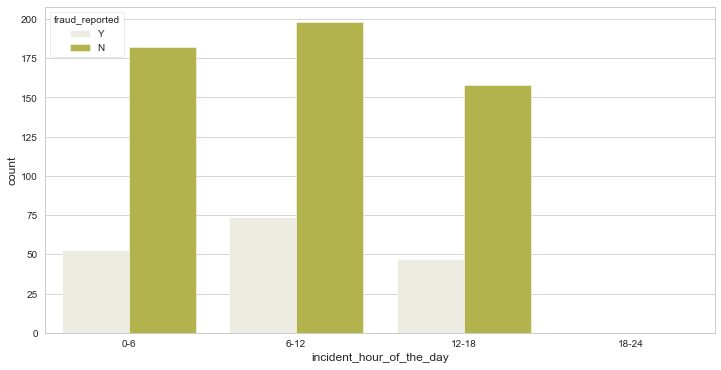

In [48]:
plt.figure(figsize = (12,6))
sns.countplot(x ='incident_hour_of_the_day',hue = 'fraud_reported',data = Idf,dodge = True,color = 'yellow',saturation = 0.4)

In [49]:
Idf['incident_hour_of_the_day'].value_counts()


6-12     272
0-6      235
12-18    205
18-24      0
Name: incident_hour_of_the_day, dtype: int64

#### number_of_vehicles_involved


In [50]:
Idf['number_of_vehicles_involved'].value_counts()


1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

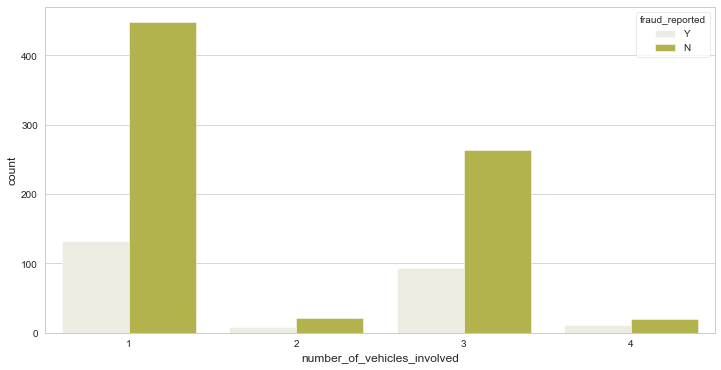

In [52]:
plt.figure(figsize = (12,6))
sns.countplot(x ='number_of_vehicles_involved',hue ='fraud_reported',data=Idf,dodge=True,color = 'yellow' , saturation = 0.4)

## bodily_injuries


In [53]:
Idf['bodily_injuries'].value_counts()


0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

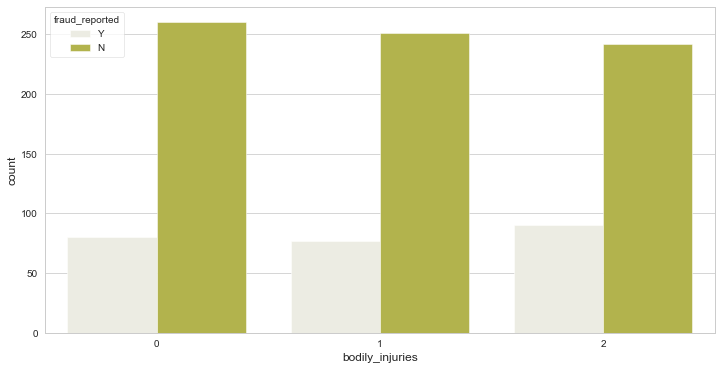

In [55]:
plt.figure(figsize = (12,6))
sns.countplot(x ='bodily_injuries', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that bodily reported as 2 has the highest fraud reports among these 3.

## witnesses

In [56]:
Idf['witnesses'].value_counts()


1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot:xlabel='witnesses', ylabel='count'>

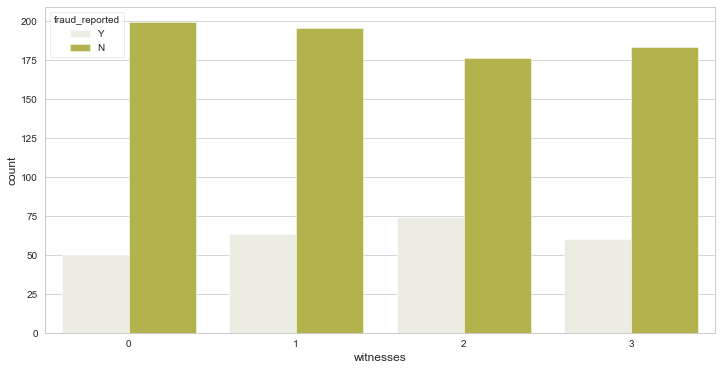

In [57]:
plt.figure(figsize = (12,6))
sns.countplot(x ='witnesses', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that the cases which has 2 witnessess has the highest fraud reported.

## total_claim_amount

In [59]:
Idf['total_claim_amount'].value_counts()


59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

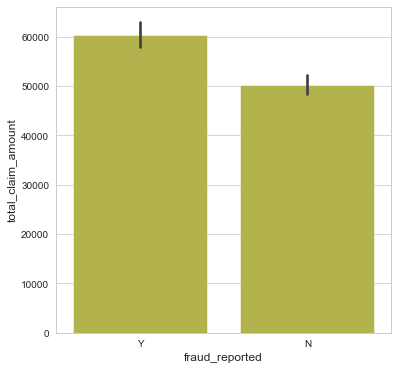

In [60]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'fraud_reported',y ='total_claim_amount', data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we are not able to find much about this feature.



## injury_claim


In [61]:
Idf['injury_claim'].value_counts()


0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

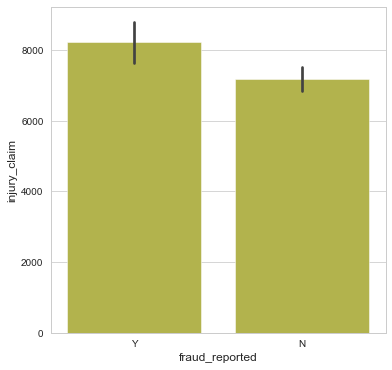

In [63]:
plt.figure(figsize = (6,6))
sns.barplot(x ='fraud_reported', y ='injury_claim', data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)


# property_claim

In [64]:
Idf['property_claim'].value_counts()


0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

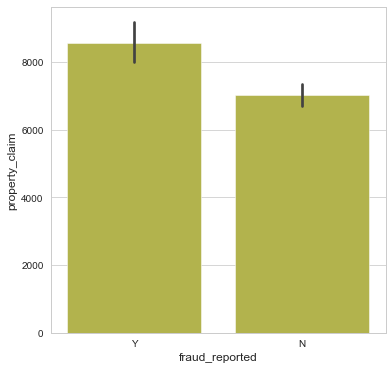

In [66]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'fraud_reported',y ='property_claim',data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

In here we are not able to find much relation in between this feature and our target variable .

## vehicle_claim

In [67]:
Idf['vehicle_claim'].value_counts()


5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

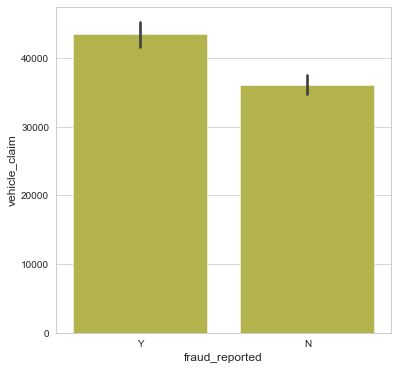

In [68]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'fraud_reported' , y ='vehicle_claim',data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

In here we are not able to find much relation in between this feature and our target variable .

## auto_year

In [69]:
Idf['auto_year'].value_counts()


1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [70]:
Idf['auto_year'] = pd.cut(Idf.auto_year, bins = [1995 , 2000 , 2005 , 2010 , 2015 ], 
                          include_lowest = True, 
                          labels = ['1995-2000' , '2000-2005' , '2005-2010' , '2010-2015'])

<AxesSubplot:xlabel='auto_year', ylabel='count'>

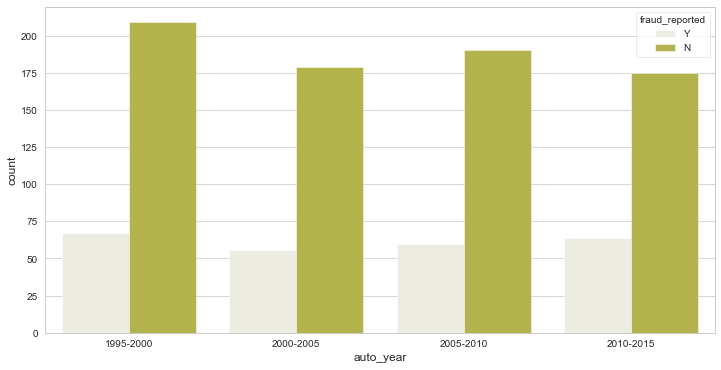

In [71]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_year', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

In [72]:
Idf['auto_year'].value_counts()


1995-2000    276
2005-2010    250
2010-2015    239
2000-2005    235
Name: auto_year, dtype: int64

## Policy State


In [73]:
Idf['policy_state'].value_counts()


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

<AxesSubplot:xlabel='policy_state', ylabel='count'>

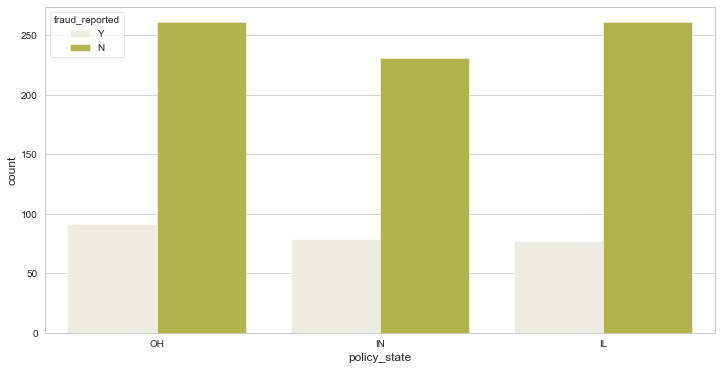

In [74]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_state' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that OH has max fraud reported and IN is a state with less case reported .

## insured_sex

In [75]:
Idf['insured_sex'].value_counts()


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [76]:
Idf[(Idf['insured_sex']=='FEMALE')& (Idf['fraud_reported']=='Y')].count(axis= 0)


months_as_customer             126
age                            126
policy_number                  126
policy_bind_date               126
policy_state                   126
policy_csl                     126
policy_deductable              126
policy_annual_premium          126
umbrella_limit                 126
insured_zip                    126
insured_sex                    126
insured_education_level        126
insured_occupation             126
insured_hobbies                126
insured_relationship           126
capital-gains                  126
capital-loss                   126
incident_date                  126
incident_type                  126
collision_type                 126
incident_severity              126
authorities_contacted          126
incident_state                 126
incident_city                  126
incident_location              126
incident_hour_of_the_day        86
number_of_vehicles_involved    126
property_damage                126
bodily_injuries     

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

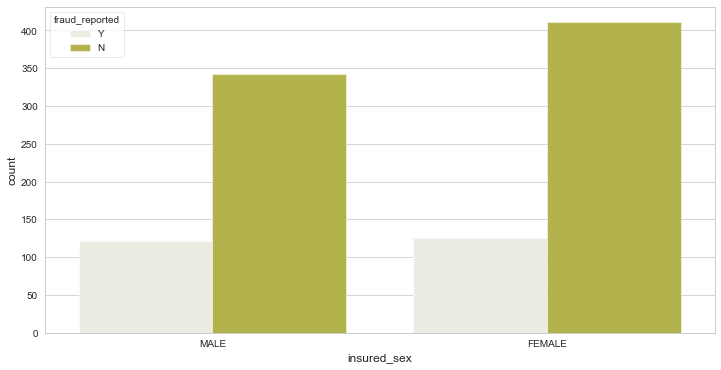

In [77]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'insured_sex' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

## insured_education_level

In [78]:
Idf['insured_education_level'].value_counts()


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

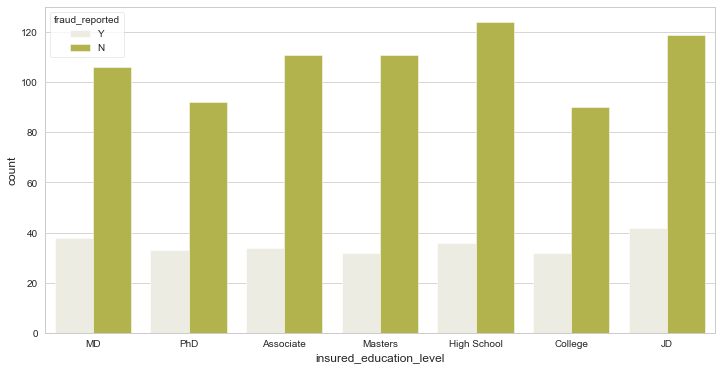

In [79]:
plt.figure(figsize = (12,6))
sns.countplot(x='insured_education_level',hue ='fraud_reported',data = Idf,dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that people who has an education level of JD has the highest fraud_reported .

## insured_occupation

In [80]:
Idf['insured_occupation'].value_counts()


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

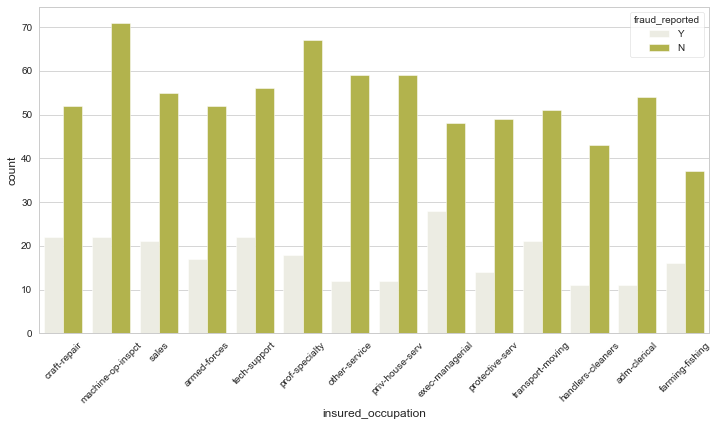

In [81]:
plt.figure(figsize = (12,6) )
plt.xticks(rotation = 45)
sns.countplot(x = 'insured_occupation',hue = 'fraud_reported',data = Idf,dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that people who has an occupation of exec_managerial has the highest fraud_reported.

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']

## insured_hobbies


In [82]:
Idf['insured_hobbies'].value_counts()


reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

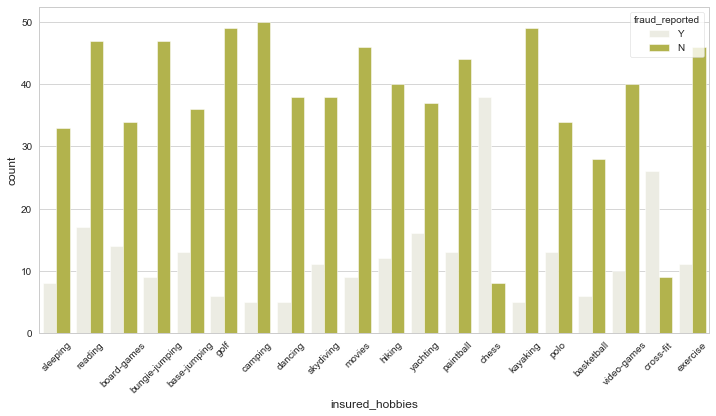

In [83]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 45)
sns.countplot(x = 'insured_hobbies',hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can sincerely observe that people whose hobbies are chess and cross-fit has the highest and second highest fraud_reported .

## insured_relationship


In [84]:
Idf['insured_relationship'].value_counts()


own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

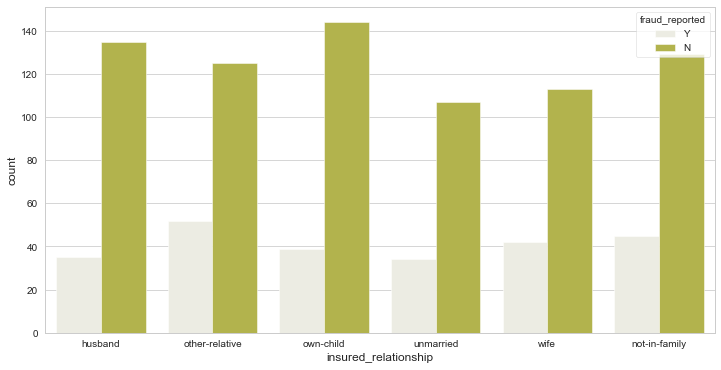

In [85]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'insured_relationship',hue = 'fraud_reported',data = Idf,dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that people who has other-relatives as in their insured-relationship has the highest fraud_reported among all the other insured-relationships.

### incident_date

In [86]:
Idf['incident_date'].value_counts()


02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [87]:
incident_date_highest_yes = Idf['fraud_reported']=='Y'


<AxesSubplot:xlabel='incident_date', ylabel='count'>

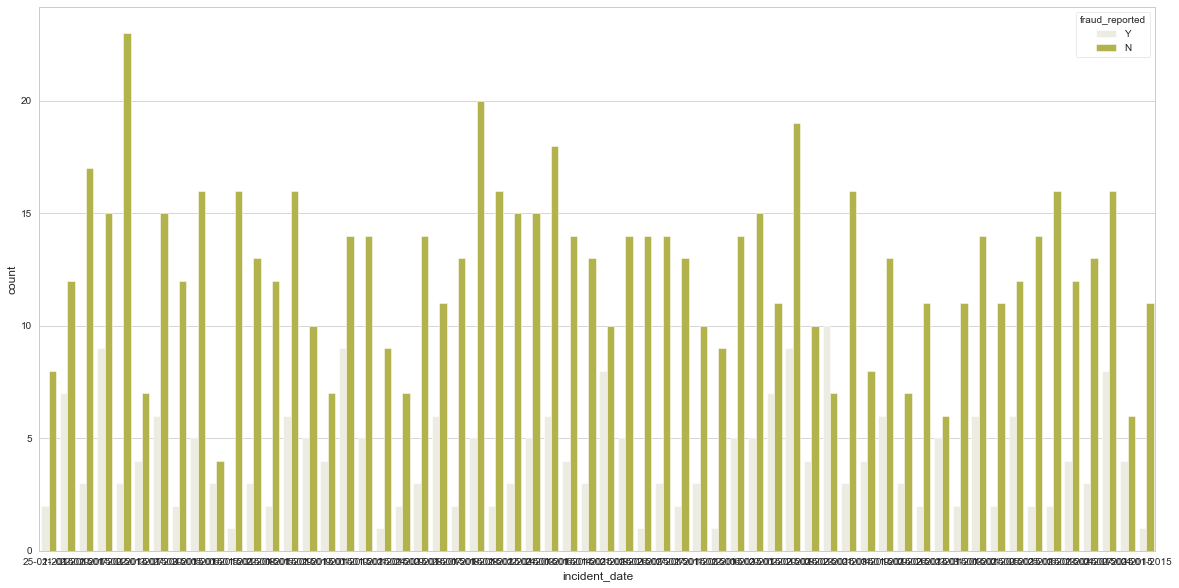

In [94]:
plt.figure(figsize = (20,10))
sns.countplot(x ='incident_date' , hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

In here we are not able to find any pattern or relationships , but we can observe that 02-02-15 is the date when the highest



## incident_type


In [95]:
Idf['incident_type'].value_counts()


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

<AxesSubplot:xlabel='incident_type', ylabel='count'>

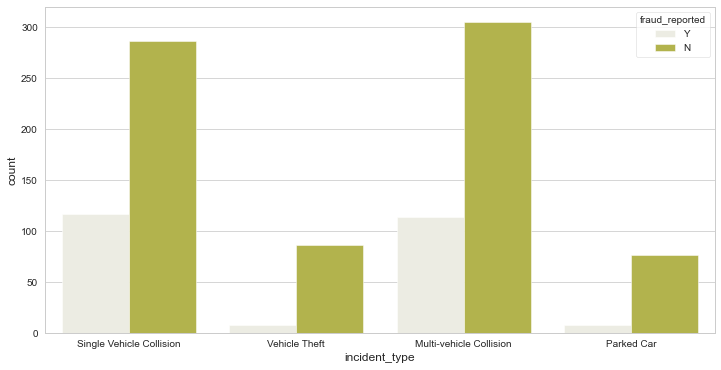

In [96]:
plt.figure(figsize = (12,6))
sns.countplot(x ='incident_type', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that Collisions are the incident types where the fraud_reported are maximum .

## collision_type

In [97]:
Idf['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

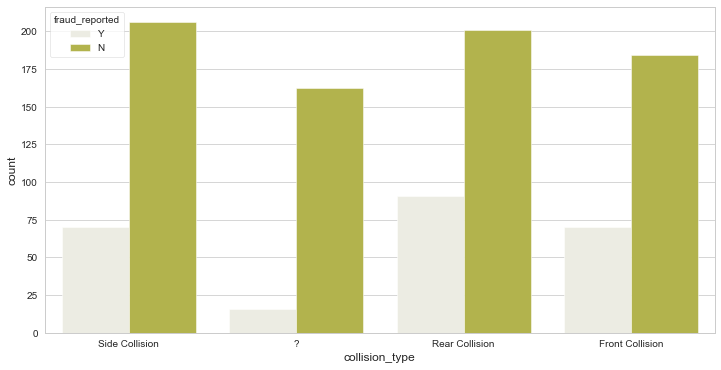

In [98]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'collision_type', hue = 'fraud_reported' , data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that there are vaalues whose collision types we don't know , We will deal with it furtherly . and also we can observe that Rear_collision are the collision_type in which there is maximum fraud_reported.

## incident_severity

In [99]:
Idf['incident_severity'].value_counts()


Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

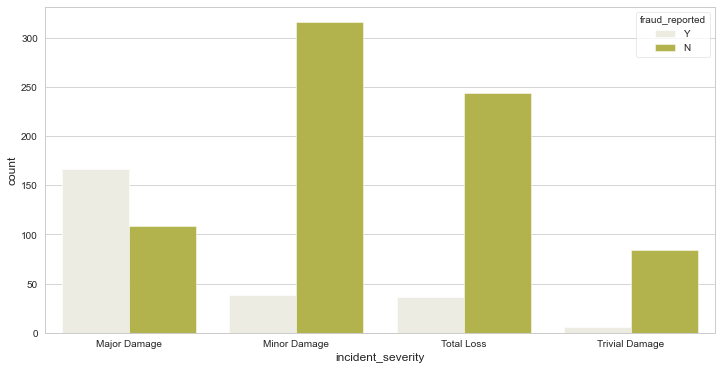

In [100]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_severity',hue = 'fraud_reported',data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that Major Damage are the incident_severity which has maximum fraud_reported.

## authorities_contacted

In [101]:
Idf['authorities_contacted'].value_counts()


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

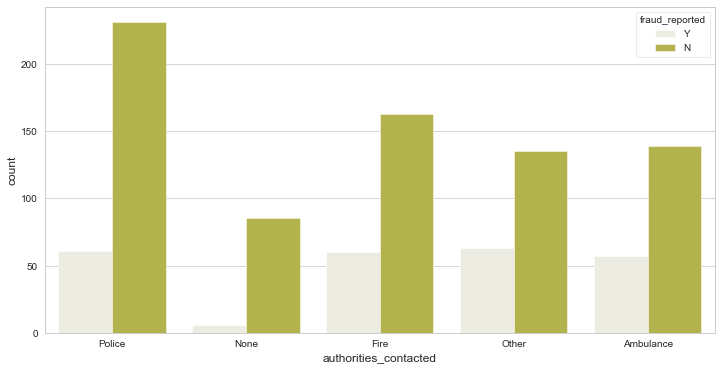

In [102]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'authorities_contacted',hue = 'fraud_reported',data = Idf,dodge = True,color = 'yellow' , saturation = 0.4)

From above we can observe that the max case reported is to the police .

## incident_state


In [103]:
Idf['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

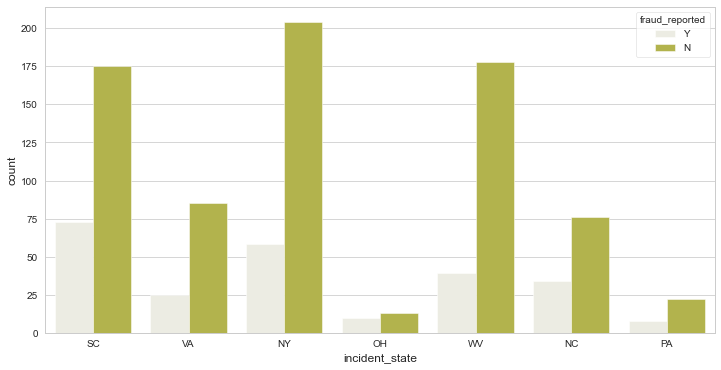

In [104]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_state', hue = 'fraud_reported',data = Idf,dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that south carolina is a state where fraud_reported is the maximum .

## incident_city

In [105]:
Idf['incident_city'].value_counts()


Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

<AxesSubplot:xlabel='incident_city', ylabel='count'>

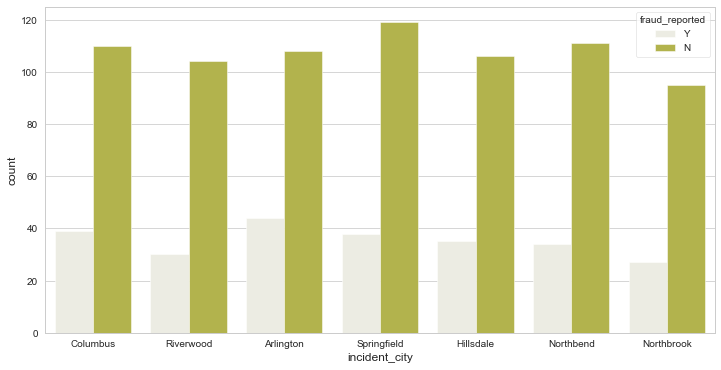

In [106]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_city', hue = 'fraud_reported',data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that Arlington is a city where the fraud_reported is maximum.

## incident_location

In [107]:
Idf['incident_location'].value_counts()


9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

<AxesSubplot:xlabel='incident_location', ylabel='count'>

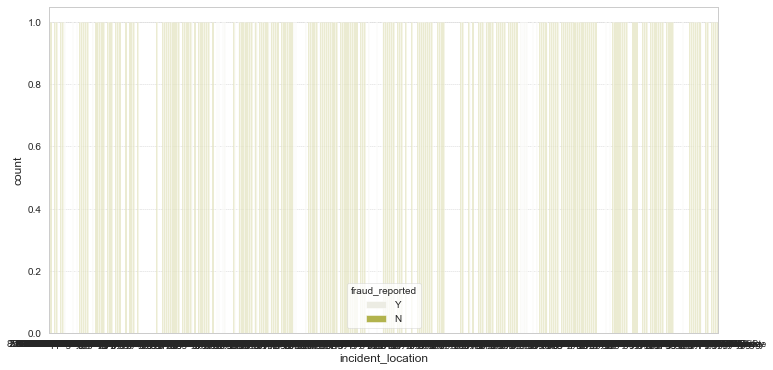

In [109]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_location', hue = 'fraud_reported',data = Idf,dodge = True ,color = 'yellow' , saturation = 0.4)


Here we are not able to find any meaningful insights from this feature.

## property_damage

In [110]:
Idf['property_damage'].value_counts()


?      360
NO     338
YES    302
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

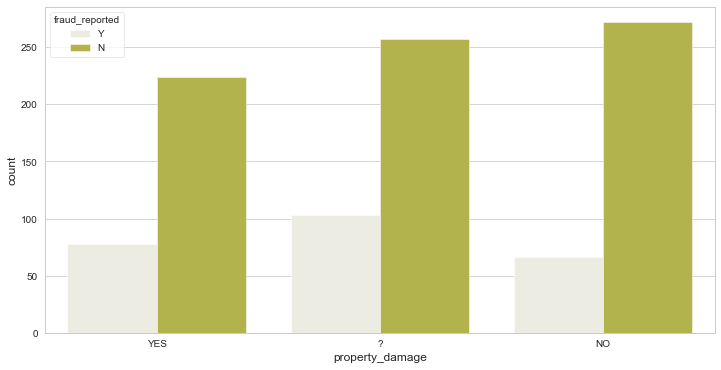

In [111]:

plt.figure(figsize = (12,6))
sns.countplot(x = 'property_damage', hue = 'fraud_reported',data = Idf , dodge = True ,color = 'yellow' , saturation = 0.4)

From above we can observe that ther are values which are not known , so we will deal with them later on.

## police_report_available

In [112]:
Idf['police_report_available'].value_counts()


?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

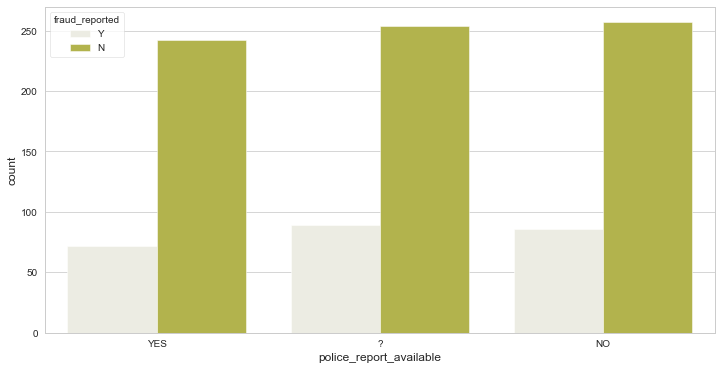

In [113]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'police_report_available',hue = 'fraud_reported',data = Idf,dodge = True,color ='yellow',saturation = 0.4)

From above we can observe that there are many missing values , hence later we will deal with them.

## auto_make

In [114]:
Idf['auto_make'].value_counts()


Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_make', hue = 'fraud_reported' , data = Idf , dodge = True,color ='yellow',saturation = 0.4)

We are not able to find any meaningful insights from this feature.

## auto_model

In [ ]:
plt.figure(figsize = (12,6))
plt.xticks(rotation = 60)
sns.countplot(x = 'auto_model', hue = 'fraud_reported' , data = Idf , dodge = True ,color ='yellow',saturation = 0.4)

From above we can observe RAM is the auto_model which has the highest fraud_reported.

## Data Preprocessing

In [ ]:
Idf.head(8)


In [ ]:
Idf['age'].value_counts()


In [ ]:
le = LabelEncoder()
Idf['age'] = le.fit_transform(Idf['age'])

In [116]:
Idf['age'].value_counts()


31-40    396
41-50    293
21-30    195
51-60     96
61-70     18
11-20      2
Name: age, dtype: int64

#### policy_number
We can drop this column as its just a random number given.

### Policy Bind Date

In [117]:
Idf['policy_bind_date'] = pd.to_datetime(Idf['policy_bind_date'])
print (Idf['policy_bind_date'].dtype)

datetime64[ns]


In [118]:
Idf['Bind_year'] = Idf['policy_bind_date'].dt.year
Idf['Bind_year'].value_counts()

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
2001    41
2006    41
1994    41
2005    40
1999    40
2007    40
1995    39
2010    38
2003    37
2004    36
2012    36
2013    35
2008    33
1993    33
2011    32
2000    31
1998    30
2015     3
Name: Bind_year, dtype: int64

In [119]:
print(Idf['Bind_year'].min())
print(Idf['Bind_year'].max())

1990
2015


In [120]:
Idf['Bind_year'] = pd.cut(Idf.Bind_year, bins = [1990 , 1995 , 2000 , 2005 , 2010 , 2015 ], 
                          include_lowest = True, 
                          labels = ['1990-1995' , '1995-2000' , '2000-2005' , '2005-2010' , '2010-2015'])
Idf['Bind_year'].value_counts()

1990-1995    264
2000-2005    204
2005-2010    195
1995-2000    188
2010-2015    149
Name: Bind_year, dtype: int64

In [121]:
le = LabelEncoder()
Idf['Bind_year'] = le.fit_transform(Idf['Bind_year'])


In [122]:
Idf['Bind_year'].value_counts()

0    264
2    204
3    195
1    188
4    149
Name: Bind_year, dtype: int64

## policy_state

In [123]:
le = LabelEncoder()
Idf['policy_state'] = le.fit_transform(Idf['policy_state'])
Idf['policy_state'].value_counts()

2    352
0    338
1    310
Name: policy_state, dtype: int64

## policy_csl

In [124]:
Idf['policy_csl'].value_counts()


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [126]:
le = LabelEncoder()
Idf['policy_csl'] = le.fit_transform(Idf['policy_csl'])
Idf['policy_csl'].value_counts()

1    351
0    349
2    300
Name: policy_csl, dtype: int64

## insured_sex

In [127]:
Idf['insured_sex'].value_counts()


FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [128]:
le = LabelEncoder()
Idf['insured_sex'] = le.fit_transform(Idf['insured_sex'])
Idf['insured_sex'].value_counts()

0    537
1    463
Name: insured_sex, dtype: int64

## insured_education_level


In [129]:
Idf['insured_education_level'].value_counts()


JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [131]:
le = LabelEncoder()
Idf['insured_education_level'] = le.fit_transform(Idf['insured_education_level'])
Idf['insured_education_level'].value_counts()


3    161
2    160
0    145
4    144
5    143
6    125
1    122
Name: insured_education_level, dtype: int64

## insured_occupation


In [132]:
Idf['insured_occupation'].value_counts()


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [133]:
le = LabelEncoder()
Idf['insured_occupation'] = le.fit_transform(Idf['insured_occupation'])
Idf['insured_occupation'].value_counts()

6     93
9     85
12    78
11    76
3     76
2     74
13    72
7     71
8     71
1     69
0     65
10    63
5     54
4     53
Name: insured_occupation, dtype: int64

## insured_hobbies


In [134]:
Idf['insured_hobbies'].value_counts()


reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

In [135]:
le = LabelEncoder()
Idf['insured_hobbies'] = le.fit_transform(Idf['insured_hobbies'])
Idf['insured_hobbies'].value_counts()

15    64
8     57
13    57
3     56
12    55
9     55
4     55
11    54
19    53
10    52
18    50
16    49
0     49
2     48
14    47
5     46
7     43
17    41
6     35
1     34
Name: insured_hobbies, dtype: int64

## insured_relationship


In [136]:
Idf['insured_relationship'].value_counts()


own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [137]:
le = LabelEncoder()
Idf['insured_relationship'] = le.fit_transform(Idf['insured_relationship'])
Idf['insured_relationship'].value_counts()

3    183
2    177
1    174
0    170
5    155
4    141
Name: insured_relationship, dtype: int64

## Capital Gain & Loss
Instead of hhaving two features we will have a single feature as Capital Difference.

In [138]:
Idf['capital_diff'] = Idf['capital-gains'] - Idf['capital-loss']
Idf['capital_diff'].value_counts()

0         251
51000       5
51500       5
45300       5
58600       4
         ... 
121300      1
90900       1
56700       1
120700      1
32100       1
Name: capital_diff, Length: 522, dtype: int64

## incident_date

In [139]:
Idf['incident_date'].value_counts()


02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

In [140]:
Idf['incident_date'] = pd.to_datetime(Idf['incident_date'])
Idf['incident_year'] = Idf['incident_date'].dt.year

## incident_type

In [141]:
Idf['incident_type'].value_counts()


Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [142]:
le = LabelEncoder()
Idf['incident_type'] = le.fit_transform(Idf['incident_type'])
Idf['incident_type'].value_counts()

0    419
2    403
3     94
1     84
Name: incident_type, dtype: int64

## collision_type


In [143]:
Idf['collision_type'].value_counts()


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [144]:
Idf['collision_type'].replace('?' , 'NA' , inplace = True)
Idf['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

In [145]:
le = LabelEncoder()
Idf['collision_type'] = le.fit_transform(Idf['collision_type'])
Idf['collision_type'].value_counts()


2    292
3    276
0    254
1    178
Name: collision_type, dtype: int64

## incident_severity


In [146]:
Idf['incident_severity'].value_counts()


Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [147]:
le = LabelEncoder()
Idf['incident_severity'] = le.fit_transform(Idf['incident_severity'])
Idf['incident_severity'].value_counts()

1    354
2    280
0    276
3     90
Name: incident_severity, dtype: int64

## authorities_contacted


In [148]:
Idf['authorities_contacted'].value_counts()


Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [149]:
le = LabelEncoder()
Idf['authorities_contacted'] = le.fit_transform(Idf['authorities_contacted'])
Idf['authorities_contacted'].value_counts()

4    292
1    223
3    198
0    196
2     91
Name: authorities_contacted, dtype: int64

## incident_state

In [150]:
Idf['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [151]:
le = LabelEncoder()
Idf['incident_state'] = le.fit_transform(Idf['incident_state'])
Idf['incident_state'].value_counts()

1    262
4    248
6    217
5    110
0    110
3     30
2     23
Name: incident_state, dtype: int64

## incident_city


In [152]:
Idf['incident_city'].value_counts()


Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [153]:
Idf['incident_city'] = le.fit_transform(Idf['incident_city'])
Idf['incident_city'].value_counts()

6    157
0    152
1    149
3    145
2    141
5    134
4    122
Name: incident_city, dtype: int64

## incident_location

In [154]:
Idf['incident_location'].value_counts()


9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

We'll drop this feature in feature selection procedure as its irrelevant to carry it for our future predictions.

## incident_hour_of_the_day

In [155]:
Idf['incident_hour_of_the_day'].value_counts()


6-12     272
0-6      235
12-18    205
18-24      0
Name: incident_hour_of_the_day, dtype: int64

We'll drop this feature as its not related anyhow with fraud reports.



In [156]:
Idf.drop('incident_hour_of_the_day' , axis = 1)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,Bind_year,capital_diff,incident_year
0,328,41-50,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2000-2005,Y,NaN,4,53300,2015
1,228,41-50,342868,2006-06-27,1,1,2000,1197.22,1,468176,...,780,3510,Mercedes,E400,2005-2010,Y,NaN,3,0,2015
2,134,21-30,687698,2000-06-09,2,0,2000,1413.14,1,430632,...,3850,23100,Dodge,RAM,2005-2010,N,NaN,1,35100,2015
3,256,41-50,227811,1990-05-25,0,1,2000,1415.74,1,608117,...,6340,50720,Chevrolet,Tahoe,2010-2015,Y,NaN,0,111300,2015
4,228,41-50,367455,2014-06-06,0,2,1000,1583.91,1,610706,...,650,4550,Accura,RSX,2005-2010,N,NaN,4,112000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,31-40,941851,1991-07-16,2,2,1000,1310.80,0,431289,...,8720,61040,Honda,Accord,2005-2010,N,NaN,0,0,2015
996,285,41-50,186934,2014-05-01,0,0,1000,1436.79,0,608177,...,18080,72320,Volkswagen,Passat,2010-2015,N,NaN,4,70900,2015
997,130,31-40,918516,2003-02-17,2,1,500,1383.49,1,442797,...,7500,52500,Suburu,Impreza,1995-2000,N,NaN,2,35100,2015
998,458,61-70,533940,2011-11-18,0,2,2000,1356.92,1,441714,...,5220,36540,Audi,A5,1995-2000,N,NaN,4,0,2015


## number_of_vehicles_involved


In [157]:
Idf['number_of_vehicles_involved'].value_counts()


1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

## property_damage

In [158]:
Idf['property_damage'].value_counts()


?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [159]:
Idf['property_damage'].replace('?' , 'NO' , inplace = True)
le = LabelEncoder()
Idf['property_damage'] = le.fit_transform(Idf['property_damage'])
Idf['property_damage'].value_counts()

0    698
1    302
Name: property_damage, dtype: int64

## bodily_injuries

In [160]:
Idf['bodily_injuries'].value_counts()


0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

## witnesses

In [161]:
Idf['witnesses'].value_counts()


1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

## police_report_available


In [162]:
Idf['police_report_available'].value_counts()


?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

Here we'll replace not known values with NO.



In [163]:
Idf['police_report_available'].replace('?' , 'NO' , inplace = True)
le = LabelEncoder()
Idf['police_report_available'] = le.fit_transform(Idf['police_report_available'])
Idf['police_report_available'].value_counts()


0    686
1    314
Name: police_report_available, dtype: int64

## total_claim_amount


In [164]:
Idf['total_claim_amount'].value_counts()


59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64

## injury_claim


In [165]:
Idf['injury_claim'].value_counts()


0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64

## property_claim

In [167]:
Idf['property_claim'].value_counts()


0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64

## vehicle_claim


In [168]:
Idf['vehicle_claim'].value_counts()


5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64

We'll just create another feature as IDV(Insurance declared value) = Total claim - Vehicle claim



In [169]:
Idf['claim'] = Idf['injury_claim']*Idf['total_claim_amount']/(Idf['property_claim']+Idf['vehicle_claim'])


# auto_make

In [170]:
Idf['auto_make'].value_counts()


Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [171]:
le = LabelEncoder()
Idf['auto_make'] = le.fit_transform(Idf['auto_make'])

## auto_year


In [172]:
Idf['auto_year'].value_counts()


1995-2000    276
2005-2010    250
2010-2015    239
2000-2005    235
Name: auto_year, dtype: int64

In [173]:
le = LabelEncoder()
Idf['auto_year'] = le.fit_transform(Idf['auto_year'])
Idf['auto_year'].value_counts()

0    276
2    250
3    239
1    235
Name: auto_year, dtype: int64

## auto_model


In [174]:
Idf['auto_model'].value_counts()


RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

We'll drop this feature in our feature selection procedure , as auto_make is sufficient.

## fraud_reported

In [175]:
Idf['fraud_reported'].value_counts()


N    753
Y    247
Name: fraud_reported, dtype: int64

In [176]:
le = LabelEncoder()
Idf['fraud_reported'] = le.fit_transform(Idf['fraud_reported'])
Idf['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Checking for percentage of null values in each column.



In [177]:
for col in Idf:
    percentage = np.round((Idf[col].isnull().sum()/1000)*100,2)
    print(col,':' , percentage,'%')

months_as_customer : 0.0 %
age : 0.0 %
policy_number : 0.0 %
policy_bind_date : 0.0 %
policy_state : 0.0 %
policy_csl : 0.0 %
policy_deductable : 0.0 %
policy_annual_premium : 0.0 %
umbrella_limit : 0.0 %
insured_zip : 0.0 %
insured_sex : 0.0 %
insured_education_level : 0.0 %
insured_occupation : 0.0 %
insured_hobbies : 0.0 %
insured_relationship : 0.0 %
capital-gains : 0.0 %
capital-loss : 0.0 %
incident_date : 0.0 %
incident_type : 0.0 %
collision_type : 0.0 %
incident_severity : 0.0 %
authorities_contacted : 0.0 %
incident_state : 0.0 %
incident_city : 0.0 %
incident_location : 0.0 %
incident_hour_of_the_day : 28.8 %
number_of_vehicles_involved : 0.0 %
property_damage : 0.0 %
bodily_injuries : 0.0 %
witnesses : 0.0 %
police_report_available : 0.0 %
total_claim_amount : 0.0 %
injury_claim : 0.0 %
property_claim : 0.0 %
vehicle_claim : 0.0 %
auto_make : 0.0 %
auto_model : 0.0 %
auto_year : 0.0 %
fraud_reported : 0.0 %
_c39 : 100.0 %
Bind_year : 0.0 %
capital_diff : 0.0 %
incident_year

## Feature Selection


In [178]:
Idf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   category      
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   int32         
 5   policy_csl                   1000 non-null   int32         
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   int32         
 11  insured_education_level      1000 non-null  

In [179]:
corr_df = Idf.corr()
target_relation = corr_df.iloc[: , 31 :32]
target_relation

,auto_year
months_as_customer,-0.008052
policy_number,-0.000135
policy_state,-0.001415
policy_csl,-0.038344
policy_deductable,0.034036
policy_annual_premium,-0.031561
umbrella_limit,-0.005077
insured_zip,-0.031958
insured_sex,-0.020006
insured_education_level,0.046047


Here we will drop some features as some of them are irrelevant to take on .



In [180]:
Idf.drop(columns =  ['months_as_customer' , 'policy_bind_date', 'policy_number' ,'policy_deductable' , 
                     'policy_annual_premium','capital-gains' , 'capital-loss' ,'incident_date', 'auto_model' , 
                     'incident_date','incident_city' ,'incident_location', 'property_claim','total_claim_amount',
                     'injury_claim' , 'vehicle_claim' , '_c39' , 'incident_year' , 'incident_hour_of_the_day' ,
                     'incident_date'] , 
                      inplace = True )   

In [181]:
Idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   age                          1000 non-null   category
 1   policy_state                 1000 non-null   int32   
 2   policy_csl                   1000 non-null   int32   
 3   umbrella_limit               1000 non-null   int64   
 4   insured_zip                  1000 non-null   int64   
 5   insured_sex                  1000 non-null   int32   
 6   insured_education_level      1000 non-null   int64   
 7   insured_occupation           1000 non-null   int32   
 8   insured_hobbies              1000 non-null   int32   
 9   insured_relationship         1000 non-null   int32   
 10  incident_type                1000 non-null   int32   
 11  collision_type               1000 non-null   int32   
 12  incident_severity            1000 non-null   int32   
 13  auth

## Heatmap

<AxesSubplot:>

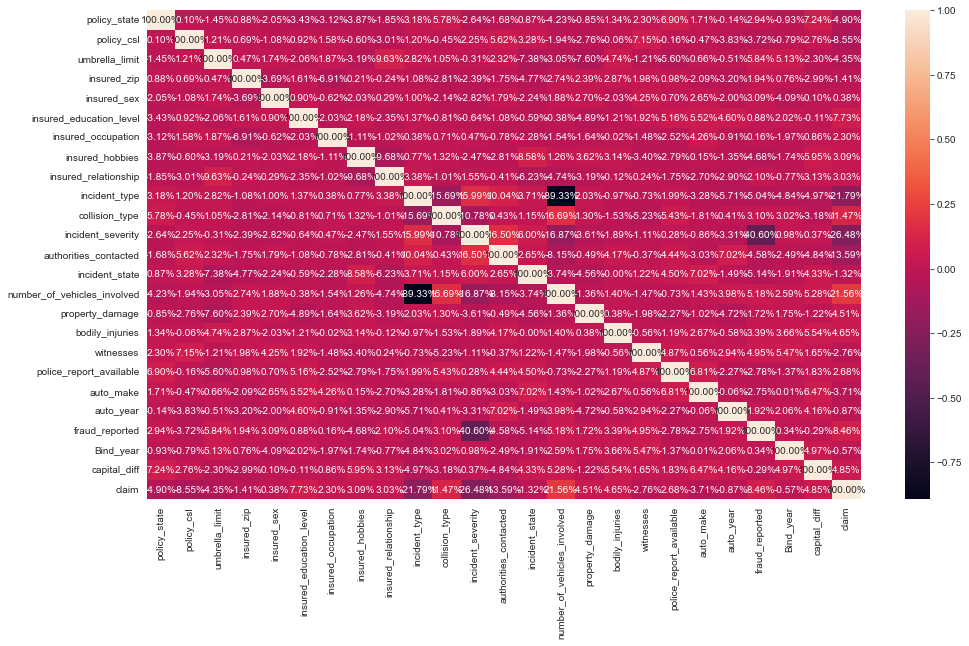

In [182]:
plt.figure(figsize = (16,9))
sns.heatmap(Idf.corr() , annot = True ,fmt = '.2%')

## Visualising & Removing Outliers


<AxesSubplot:>

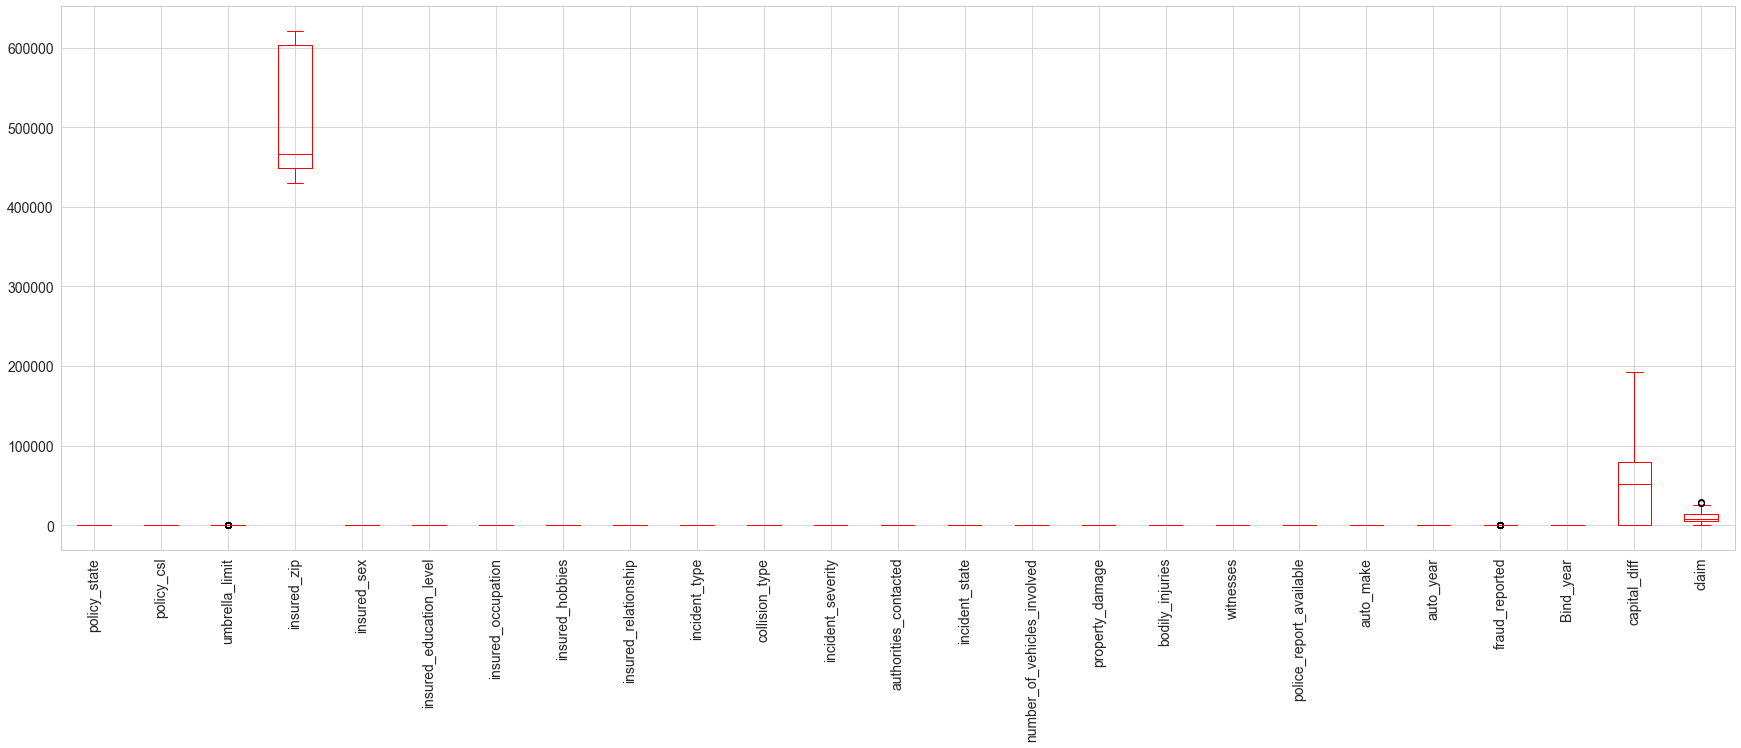

In [223]:

Idf.plot(rot = 90,kind='box',fontsize=14,figsize=(30,10),color='r')

From above we can observe that there are outliers present so we'll use zscore method to filter values.



## Removing Outliers:
#### Zscore method

In [227]:
Idf.columns

Index(['age', 'policy_state', 'policy_csl', 'umbrella_limit', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available', 'auto_make',
       'auto_year', 'fraud_reported', 'Bind_year', 'capital_diff', 'claim'],
      dtype='object')

In [230]:
#Features having outliers
features=Idf[['umbrella_limit','fraud_reported','claim']]
z=np.abs(zscore(features))
IDF=Idf[(z<3).all(axis=1)]
IDF

,age,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,fraud_reported,Bind_year,capital_diff,claim
0,41-50,2,1,0,466132,1,4,2,17,0,...,1,1,2,1,10,1,1,4,53300,7161.000000
1,41-50,1,1,1,468176,1,4,6,15,2,...,0,0,0,0,8,2,1,3,0,921.818182
2,21-30,2,0,1,430632,0,6,11,2,3,...,0,2,3,0,4,2,0,1,35100,9900.000000
3,41-50,0,1,1,608117,0,6,1,2,4,...,0,1,2,0,3,3,1,0,111300,7044.444444
4,41-50,0,2,1,610706,1,0,11,2,4,...,0,0,1,0,0,2,0,4,112000,1625.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31-40,2,2,0,431289,0,5,2,13,4,...,1,0,1,0,6,2,0,0,0,21800.000000
996,41-50,0,0,0,608177,0,6,9,17,5,...,1,2,3,0,13,3,0,4,70900,21696.000000
997,31-40,2,1,1,442797,0,5,1,3,2,...,0,2,3,1,11,0,0,2,35100,8437.500000
998,61-70,0,2,1,441714,1,0,5,0,5,...,0,0,1,1,1,0,0,4,0,5872.500000


In [232]:
#Checking shape of new dataset
IDF.shape

(997, 26)

In [233]:
#Checking shape of old dataset
Idf.shape

(1000, 26)

In [234]:
#Checking dataloss in zscore method
Dataloss = (((1000-997)/1000)*100)
Dataloss

0.3

We have successfully removed all the outliers. Now we need to check for skewness in the dataset if there's any .



## Predictor and Target Variable


In [236]:
x = Idf.drop('fraud_reported' , axis = 1)
x

,age,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,Bind_year,capital_diff,claim
0,41-50,2,1,0,466132,1,4,2,17,0,...,1,1,1,2,1,10,1,4,53300,7161.000000
1,41-50,1,1,1,468176,1,4,6,15,2,...,1,0,0,0,0,8,2,3,0,921.818182
2,21-30,2,0,1,430632,0,6,11,2,3,...,3,0,2,3,0,4,2,1,35100,9900.000000
3,41-50,0,1,1,608117,0,6,1,2,4,...,1,0,1,2,0,3,3,0,111300,7044.444444
4,41-50,0,2,1,610706,1,0,11,2,4,...,1,0,0,1,0,0,2,4,112000,1625.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31-40,2,2,0,431289,0,5,2,13,4,...,1,1,0,1,0,6,2,0,0,21800.000000
996,41-50,0,0,0,608177,0,6,9,17,5,...,1,1,2,3,0,13,3,4,70900,21696.000000
997,31-40,2,1,1,442797,0,5,1,3,2,...,3,0,2,3,1,11,0,2,35100,8437.500000
998,61-70,0,2,1,441714,1,0,5,0,5,...,1,0,0,1,1,1,0,4,0,5872.500000


In [237]:
y = Idf['fraud_reported']
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

## Skewness


In [238]:
x.skew()


policy_state                  -0.026177
policy_csl                     0.088928
umbrella_limit                 1.486693
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
auto_make                     -0.018797
auto_year                      0.042369
Bind_year                      0.152606
capital_diff                   0.321336
claim                          0.421122
dtype: float64

# Removing skewness using yeo-johnson method


In [285]:
#number_datatype
number_datatypes=[]
for x in IDF.dtypes.index:
    if IDF.dtypes[x]=='float64' or IDF.dtypes[x]=='int64':
        number_datatypes.append(x)
print('number datatype = ',number_datatypes)        


for col in number_datatypes:
    if Idf.skew().loc[col]>.55:
        Idf[col]=np.log1p(Idf[col])

number datatype =  ['umbrella_limit', 'insured_zip', 'insured_education_level', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'capital_diff', 'claim']


In [242]:
#Creating a list of skewed features
features=["umbrella_limit","insured_zip","insured_education_level","number_of_vehicles_involved","bodily_injuries","witnesses","capital_diff","claim"]

Taking a list as features with all the columns with skewness.


In [272]:
from sklearn.preprocessing import PowerTransformer
x_t = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [258]:
IDF[features] = scaler.fit_transform(IDF[features].values)


In [259]:
Idf.skew()


policy_state                  -0.026177
policy_csl                     0.088928
umbrella_limit                 1.486693
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
incident_type                  0.101507
collision_type                -0.177814
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
auto_make                     -0.018797
auto_year                      0.042369
fraud_reported                 1.175051
Bind_year                      0.152606
capital_diff                   0.321336
claim                          0.421122


In [260]:
#Checking skewness again
IDF[features].skew()

umbrella_limit                 1.482005
insured_zip                    0.667171
insured_education_level       -0.032002
number_of_vehicles_involved    0.340988
bodily_injuries               -0.029961
witnesses                     -0.040303
capital_diff                  -0.223551
claim                         -0.037841
dtype: float64

Using yeo_johnson method skewness has been removed.


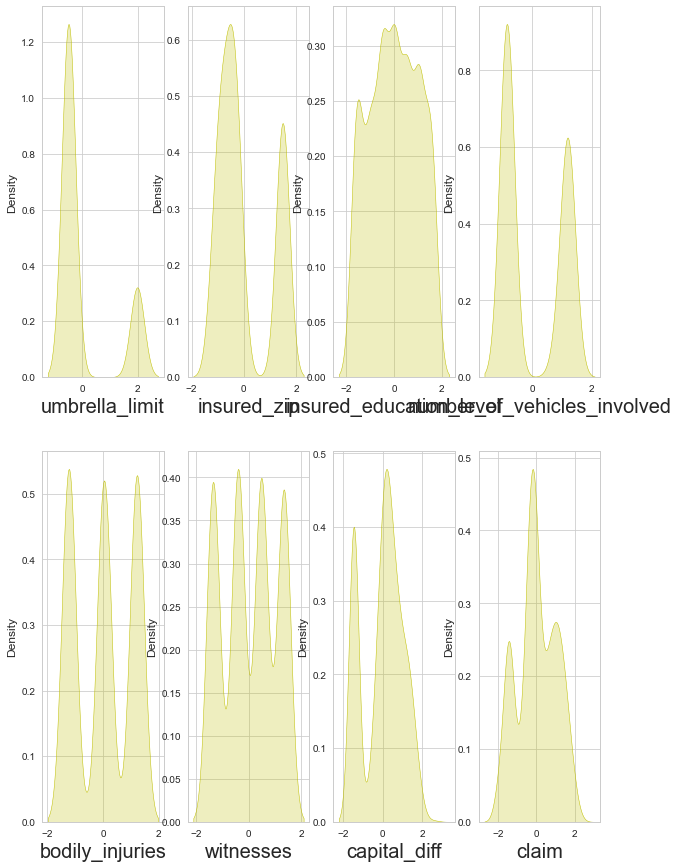

In [261]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in IDF[features]:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(IDF[column],color='y',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From above we can observe that we have sucessfully removed skewness and outliers from our dataset.



In [274]:
cor=IDF.corr()
cor

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,...,property_damage,bodily_injuries,witnesses,police_report_available,auto_make,auto_year,fraud_reported,Bind_year,capital_diff,claim
policy_state,1.000000,-0.000439,-0.015129,0.012080,-0.019207,-0.036418,-0.033317,-0.036824,-0.016707,0.032842,...,-0.009306,0.014741,0.025133,0.068362,0.017303,-0.001873,0.031627,-0.009151,0.069750,-0.045364
policy_csl,-0.000439,1.000000,0.010931,0.008697,-0.010676,0.006773,0.015729,-0.003692,-0.028554,0.013912,...,-0.029214,-0.002710,0.072749,-0.000658,-0.003890,-0.038421,-0.035883,-0.009175,0.032730,-0.070809
umbrella_limit,-0.015129,0.010931,1.000000,-0.000937,0.018007,-0.020248,0.018976,-0.031747,0.096489,0.028511,...,-0.077046,0.045862,-0.012342,-0.056008,0.007290,-0.004349,0.058800,0.050578,-0.023123,-0.033535
insured_zip,0.012080,0.008697,-0.000937,1.000000,-0.039187,0.014597,-0.072952,0.006515,-0.006087,-0.009822,...,0.023892,0.032900,0.021287,0.006169,-0.023875,-0.030725,0.028654,0.010217,-0.032976,-0.017354
insured_sex,-0.019207,-0.010676,0.018007,-0.039187,1.000000,0.009103,-0.003555,-0.020481,0.002527,0.011036,...,0.027839,-0.020449,0.042882,0.009852,0.026295,-0.020658,0.029177,-0.041775,0.003540,0.003867
insured_education_level,-0.036418,0.006773,-0.020248,0.014597,0.009103,1.000000,-0.022998,0.025820,-0.019057,0.015141,...,-0.049388,-0.011028,0.022029,0.053170,0.055286,0.043256,0.011545,0.021925,-0.007891,0.082153
insured_occupation,-0.033317,0.015729,0.018976,-0.072952,-0.003555,-0.022998,1.000000,-0.007968,-0.006425,0.004552,...,-0.016098,0.001327,-0.011590,-0.028416,0.041622,-0.011338,0.005721,-0.017165,0.004431,0.019592
insured_hobbies,-0.036824,-0.003692,-0.031747,0.006515,-0.020481,0.025820,-0.007968,1.000000,-0.101651,0.004826,...,0.036627,0.030533,-0.038561,-0.028193,0.002039,-0.011107,-0.050554,-0.018180,0.061216,0.026381
insured_relationship,-0.016707,-0.028554,0.096489,-0.006087,0.002527,-0.019057,-0.006425,-0.101651,1.000000,0.031394,...,-0.032122,-0.003682,-0.000539,-0.017103,-0.026244,-0.026362,0.017464,-0.009079,0.033885,0.028018
incident_type,0.032842,0.013912,0.028511,-0.009822,0.011036,0.015141,0.004552,0.004826,0.031394,1.000000,...,0.020596,-0.009571,-0.009302,0.018620,-0.032728,-0.055791,-0.052054,-0.048209,-0.052743,-0.242260


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let's plot it using heat map.



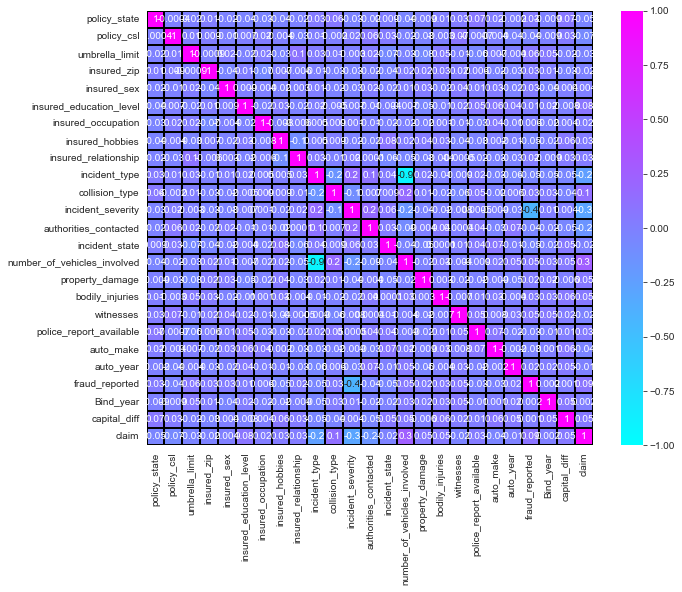

In [275]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(IDF.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="cool")
plt.yticks(rotation=0);

Correlation Bar Plot comparing features with our label


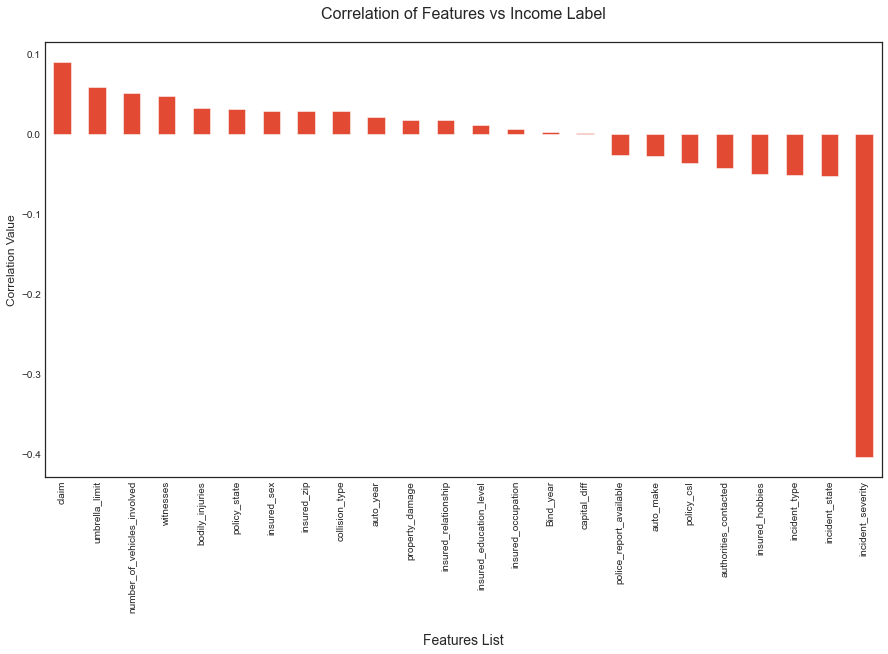

In [288]:
plt.style.use('seaborn-white')

cor = IDF.corr()
plt.figure(figsize=(15,8))
cor['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.

In [289]:
IDF.dropna(inplace=True)


Making sure that there are no null values present in our dataframe.



## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label


In [302]:
X = IDF.drop('fraud_reported', axis=1)
Y = IDF['fraud_reported']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.



### Resolving the class imbalance issue in our label column


In [303]:
Y.value_counts()


0    751
1    246
Name: fraud_reported, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates a huge class imbalance that we will have to fix by using the oversampling method.

In [304]:
from imblearn.over_sampling import SMOTE


In [314]:
IDF.drop('age' , axis = 1,inplace=True)


#### Principal Component Analysis (PCA)


In [319]:
pca = PCA(n_components = 'mle' , svd_solver = 'full' )
xpca = pca.fit_transform(IDF)

In [320]:
xpca

array([[-7.41449196,  0.28295078,  5.73970794, ...,  0.07634201,
         0.66233655,  0.50817241],
       [-5.30019496, -0.72419089,  1.41254173, ..., -0.04654151,
        -0.37077791,  0.6265566 ],
       [ 7.89877785, -0.76735074, -4.94600121, ..., -0.26847066,
        -0.21153724, -0.47912824],
       ...,
       [ 6.76360991,  0.27635634,  7.14061226, ...,  0.51273346,
         0.21482092, -0.34049164],
       [ 9.94016504,  5.45093193, -2.32528553, ...,  0.97598841,
         0.19646369, -0.50712206],
       [-1.35037322, -3.92847766, -2.2863281 , ..., -0.14972673,
        -0.38519756, -0.31492555]])

In [321]:
x_f = pd.DataFrame(xpca )
x_f

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-7.414492,0.282951,5.739708,-0.546547,-1.513640,2.100410,1.337666,-1.906443,1.458525,1.290782,...,0.308844,0.642102,0.372440,1.171801,-0.044888,-0.345531,0.619883,0.076342,0.662337,0.508172
1,-5.300195,-0.724191,1.412542,-1.565674,1.126559,2.506544,0.232871,-1.506725,0.329224,0.995254,...,0.958484,0.200864,1.130076,1.084984,0.265529,-0.203654,0.540491,-0.046542,-0.370778,0.626557
2,7.898778,-0.767351,-4.946001,1.804016,0.137256,0.386872,2.229022,1.366176,-0.623391,0.247864,...,2.325128,-1.244033,-0.759206,0.833997,-1.475471,-0.447276,-0.608069,-0.268471,-0.211537,-0.479128
3,7.765964,6.415817,2.136814,0.967313,2.086692,1.393221,-0.127741,1.264607,-2.300249,0.241643,...,0.672912,-0.980218,2.085165,-0.177531,0.868149,-1.050626,-0.610414,-0.178205,-0.195766,0.299035
4,7.953219,2.363743,-7.529713,1.648262,1.686408,0.439534,-0.481228,-2.897622,-0.426517,-0.023233,...,-0.331317,-0.263514,2.538658,-0.699433,1.567671,-0.142640,0.562996,0.208923,-0.295867,-0.408316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,-3.147050,3.487453,2.972051,3.524455,1.409992,-0.413991,-2.258933,1.322562,-0.885210,0.736942,...,0.714775,1.039316,-0.007571,0.522895,-0.251462,2.395769,-0.383208,-0.680553,0.421424,-0.198527
993,-7.238210,-6.451060,2.276739,0.309359,2.137104,-2.297124,0.441998,-2.396978,-1.171105,1.712631,...,-0.885080,0.558884,-0.289978,-1.316945,-0.158025,-0.653396,-0.347359,-0.690241,0.341559,-0.506887
994,6.763610,0.276356,7.140612,3.267174,-0.778057,0.821184,2.327959,0.588758,1.718168,-0.396806,...,2.408604,-1.296017,-0.635626,0.750010,-0.700426,0.016548,-0.619258,0.512733,0.214821,-0.340492
995,9.940165,5.450932,-2.325286,1.841596,2.335012,0.019247,0.630055,-1.972938,2.273491,0.051099,...,1.644051,1.532931,1.039802,0.083658,1.569353,0.089531,0.424677,0.975988,0.196464,-0.507122


In [322]:
print(pca.components_)


[[ 5.38619633e-03  4.68750072e-04  6.17454775e-03 -1.16901447e-03
   1.82973772e-03 -4.77724925e-03  1.13379943e-02 -9.98433183e-01
   3.31914600e-02 -7.13686599e-04 -1.99402889e-03  3.91931689e-03
   7.11007232e-03 -3.76137713e-02 -3.91172894e-03 -2.96895899e-03
  -5.55646306e-03  6.96075245e-03  2.21110892e-03 -4.53967744e-03
   2.27595229e-03  3.90503310e-03  4.77804498e-03 -1.12068688e-02
  -4.80352473e-03]
 [ 1.56958572e-03 -1.50608085e-03 -3.98216074e-03  1.65500981e-02
  -2.13566897e-03 -7.05020105e-03 -6.39731083e-01 -2.02184676e-03
   1.22042240e-02  6.19392975e-03  2.10745094e-03  1.37137477e-03
   1.36595407e-02 -2.84876421e-02 -1.00629335e-03  2.01733155e-03
  -5.66022627e-03  2.97363524e-04 -3.87035190e-03 -7.67421296e-01
   2.50027828e-03  1.85934832e-03  3.75695932e-03 -1.32961438e-02
   3.35974527e-03]
 [ 8.47657115e-03 -2.88887979e-03 -3.20422989e-03  1.09252149e-02
   2.51778969e-03  1.44675278e-02 -7.67821141e-01 -1.37771983e-02
  -6.32625623e-03 -7.45509244e-03 -5.8

### Implementing Machine Learning Models
## Finding Best Random State

In [337]:
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,Y_train,Y_test=train_test_split(x_f,Y,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    predlr = lr.predict(X_test)
    acc=accuracy_score(Y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
    
print('Best accuracy is ',maxAccu, 'on random state ',maxRS)

Best accuracy is  1.0 on random state  0


In [338]:
X_train,X_test,Y_train,Y_test=train_test_split(x_f,Y,test_size=.30,random_state=18)

models = [LogisticRegression(),
             KNeighborsClassifier(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             DecisionTreeClassifier(),
             GaussianNB(),
             ExtraTreeClassifier(),
             GradientBoostingClassifier(),
             BaggingClassifier()
         ]

names = ['LogisticRegression','K Nearest Neighbor','Support Vector Classifier','Random Forest','AdaBoost Classifier',
         'Decision Tree Classifier' , 'GaussianNB' , 'ExtraTreeClassifier','GradientBoostingClassifier',
         'BaggingClassifier' ]

for model,name in zip(models,names):
    fit = model.fit(X_train , Y_train)
    Y_predicted = model.predict(X_test)
    score = model.score(X_train , Y_train)
    print(name ," - " ,score)
    print("Accuracy:",accuracy_score(Y_predicted, Y_test))
    print("Confusion Matrix:\n",confusion_matrix(Y_predicted, Y_test))
    print("\t\tclassification report")
    print("-" * 52)
    print(classification_report(Y_predicted , Y_test))

LogisticRegression  -  1.0
Accuracy: 1.0
Confusion Matrix:
 [[227   0]
 [  0  73]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        73

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

K Nearest Neighbor  -  0.7890961262553802
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[208  61]
 [ 19  12]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       269
           1       0.16      0.39      0.23        31

    accuracy                           0.73       300
   macro avg       0.54      0.58      0.53       300
weighted avg       0.84      0.73      0.78       3

# Accuracy Plot
Plotting Accuracies of different Algorithms to find the perfect one for our model.

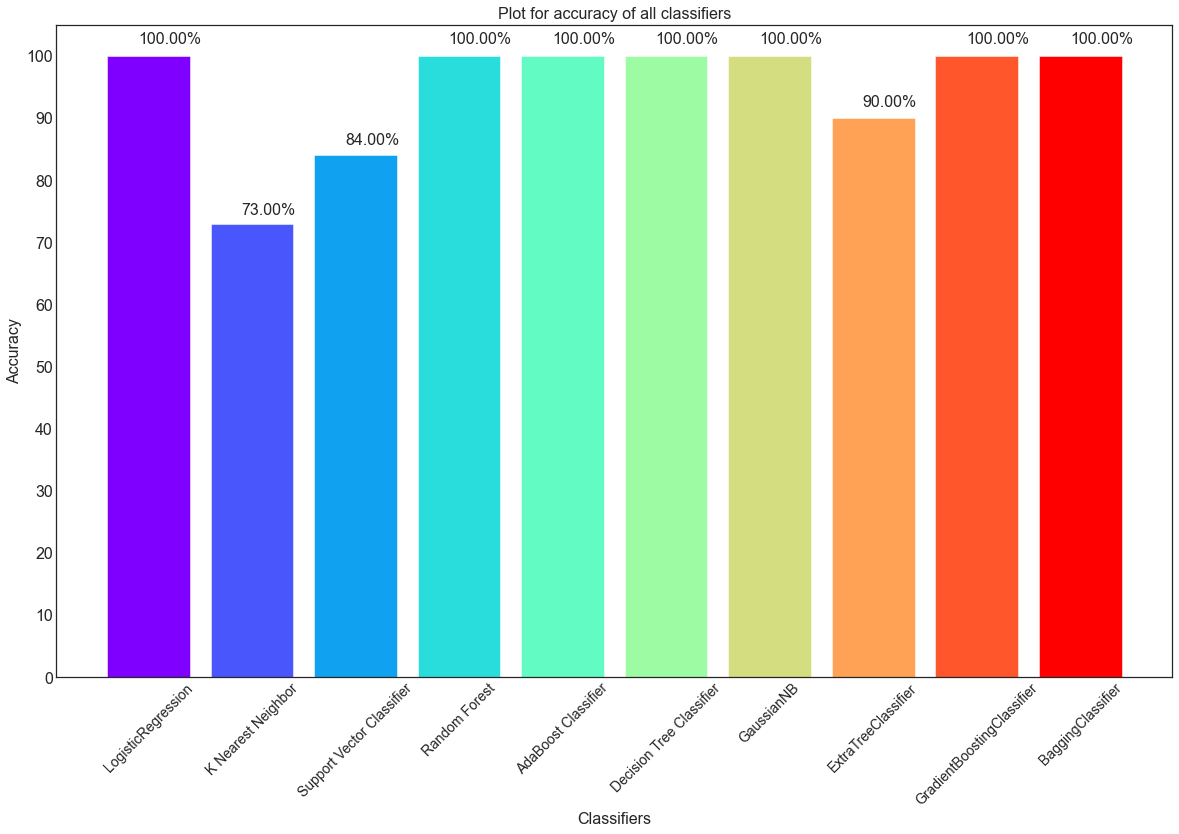

In [339]:
accuracies  = [100 , 73 , 84 , 100 , 100 , 100 , 100 , 90 , 100 , 100]

plt.figure(figsize = (20,12))
colors = rainbow(np.linspace(0, 1, len(models)))
barplot = plt.bar(x = names , height = accuracies , color = colors ,tick_label = names)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(rotation = 45 ,  fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)

from above we can observe that most of our models are giving 100% accuracy except KNN,SVC and Gradientboosting

#### Training Logistic Regression again

In [341]:
X_train,X_test,Y_train,Y_test=train_test_split(x_f,Y,test_size=.30,random_state=18)

lr  = LogisticRegression()
lr.fit(X_train , Y_train)
pred_lr = lr.predict(X_test)
print("Accuracy:",accuracy_score(pred_lr, Y_test))
print("Confusion Matrix:\n",confusion_matrix(pred_lr , Y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(pred_lr , Y_test))

Accuracy: 1.0
Confusion Matrix:
 [[227   0]
 [  0  73]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        73

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## Logistic Regression Hyperparameter Tuning


In [344]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train , Y_train)

ab_grid_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy:",accuracy_score(ab_grid_pred , Y_test))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Accuracy: 1.0
Best: 1.000000 using {'solver': 'newton-cg'}
1.000000 (0.000000) with: {'solver': 'newton-cg'}
1.000000 (0.000000) with: {'solver': 'lbfgs'}
1.000000 (0.000000) with: {'solver': 'liblinear'}


## Gaussian NB again


In [348]:
X_train,X_test,Y_train,Y_test=train_test_split(x_f,Y,test_size=.30,random_state=18)

gb = GaussianNB()
gb.fit(X_train, Y_train)
pred_gb = gb.predict(X_test)
gb.score(X_train, Y_train)
acc_random_forest = round(gb.score(X_train , Y_train) * 100, 2)
print("Accuracy:",accuracy_score(pred_gb, Y_test))
print("Confusion Matrix:\n",confusion_matrix(pred_gb , Y_test))
print("\t\tclassification report")
print("-" * 52)
print(classification_report(pred_gb , Y_test))

Accuracy: 1.0
Confusion Matrix:
 [[227   0]
 [  0  73]]
		classification report
----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00        73

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



## PLotting y_test and y_predicted for our datset .


>1, train: 1.000, test: 1.000
>2, train: 1.000, test: 1.000
>3, train: 1.000, test: 1.000
>4, train: 1.000, test: 1.000
>5, train: 1.000, test: 1.000
>6, train: 1.000, test: 1.000
>7, train: 1.000, test: 1.000
>8, train: 1.000, test: 1.000
>9, train: 1.000, test: 1.000
>10, train: 1.000, test: 1.000
>11, train: 1.000, test: 1.000
>12, train: 1.000, test: 1.000
>13, train: 1.000, test: 1.000
>14, train: 1.000, test: 1.000
>15, train: 1.000, test: 1.000
>16, train: 1.000, test: 1.000
>17, train: 1.000, test: 1.000
>18, train: 1.000, test: 1.000
>19, train: 1.000, test: 1.000
>20, train: 1.000, test: 1.000
>21, train: 1.000, test: 1.000
>22, train: 1.000, test: 1.000
>23, train: 1.000, test: 1.000
>24, train: 1.000, test: 1.000
>25, train: 1.000, test: 1.000
>26, train: 1.000, test: 1.000
>27, train: 1.000, test: 1.000
>28, train: 1.000, test: 1.000
>29, train: 1.000, test: 1.000
>30, train: 1.000, test: 1.000


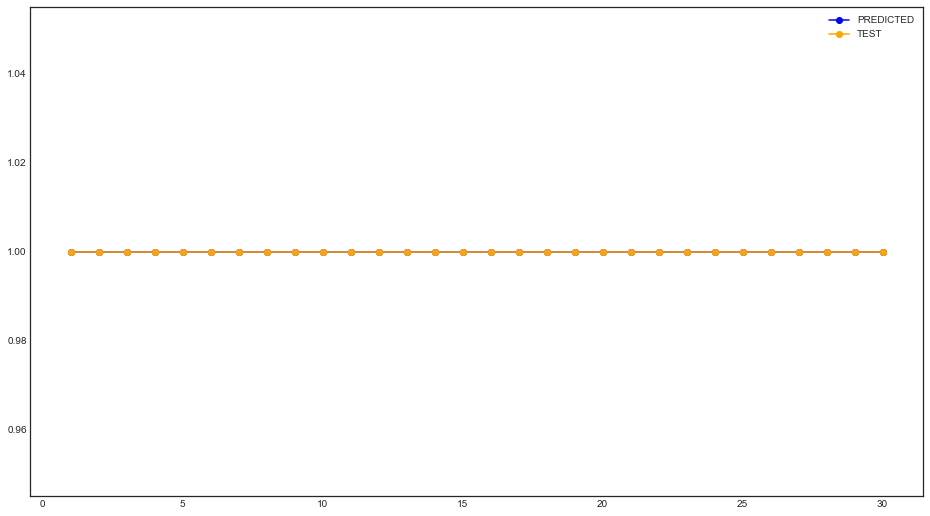

In [350]:
X_train,X_test,Y_train,Y_test=train_test_split(x_f,Y,test_size=.30,random_state=18)

train_scores, test_scores = list(), list()
values = [i for i in range(1,31)]

for i in values:

    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    grid = dict(solver=solvers)

    model = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy')
    
    model.fit(X_train, Y_train)
   
    train_y_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train,train_y_pred)
    train_scores.append(train_accuracy)
   
    test_y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, test_y_pred)
    test_scores.append(test_accuracy)
    
    
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_accuracy, test_accuracy))

plt.figure(figsize=(16,9))
plt.plot(values, train_scores, '-o', label='PREDICTED' ,color ='blue')
plt.plot(values, test_scores, '-o', label='TEST' , color = 'orange')
plt.legend()
plt.show()

## Getting the probabilities



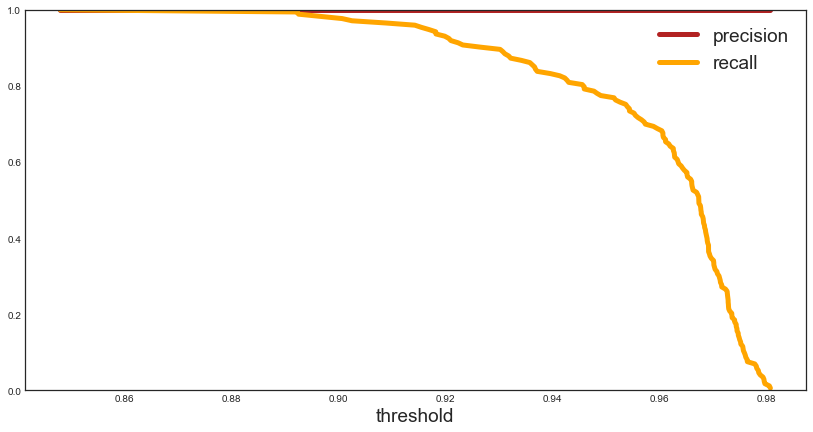

In [351]:
y_scores = grid_search.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5 , color = 'firebrick')
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5 , color = 'orange')
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [352]:
import joblib
joblib.dump(lr , 'LogisticRegressio.pkl')

['LogisticRegressio.pkl']